In [1]:
!pip install pandas scikit-learn joblib

# Decision Tree->

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

sensory_abnormal_df = pd.read_csv('E:/Research data/MS/Sensory_Abnormal.csv')
sensory_normal_df = pd.read_csv('E:/Research data/MS/Sensory_Normal.csv')

sensory_abnormal_df['Sensory_Status'] = 'Abnormal'
sensory_normal_df['Sensory_Status'] = 'Normal'

data_df = pd.concat([sensory_abnormal_df, sensory_normal_df])

data_df['Sensory_Status'] = data_df['Sensory_Status'].map({'Normal': 0, 'Abnormal': 1})

features = data_df.drop(columns=['Sensory_Status', 'Image'])
labels = data_df['Sensory_Status']

features.replace([np.inf, -np.inf], np.nan, inplace=True)

features.fillna(features.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

joblib.dump(model, 'sensory_status_model.joblib')



Accuracy: 0.8389261744966443
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.88      0.79      0.84        77

    accuracy                           0.84       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.84      0.84      0.84       149



['sensory_status_model.joblib']

# Random Forest ->

In [8]:
from sklearn.ensemble import RandomForestClassifier

sensory_abnormal_df['Sensory_Status'] = 'Abnormal'
sensory_normal_df['Sensory_Status'] = 'Normal'

data_df = pd.concat([sensory_abnormal_df, sensory_normal_df])

data_df['Sensory_Status'] = data_df['Sensory_Status'].map({'Normal': 0, 'Abnormal': 1})

features = data_df.drop(columns=['Sensory_Status', 'Image'])
labels = data_df['Sensory_Status']

features.replace([np.inf, -np.inf], np.nan, inplace=True)

features.fillna(features.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

joblib.dump(model, 'sensory_status_rf_model.joblib')



Accuracy: 0.8456375838926175
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        72
           1       0.86      0.84      0.85        77

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149



['sensory_status_rf_model.joblib']

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

sensory_abnormal_df = pd.read_csv('E:/Research data/MS/Sensory_Abnormal.csv')
sensory_normal_df = pd.read_csv('E:/Research data/MS/Sensory_Normal.csv')

sensory_abnormal_df['Sensory_Status'] = 'Abnormal'
sensory_normal_df['Sensory_Status'] = 'Normal'

data_df = pd.concat([sensory_abnormal_df, sensory_normal_df])

data_df['Sensory_Status'] = data_df['Sensory_Status'].map({'Normal': 0, 'Abnormal': 1})

features = data_df.drop(columns=['Sensory_Status', 'Image'])
labels = data_df['Sensory_Status']

features.replace([np.inf, -np.inf], np.nan, inplace=True)

features.fillna(features.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

joblib.dump(best_model, 'sensory_status_best_rf_model.joblib')



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy: 0.8590604026845637
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        72
           1       0.88      0.84      0.86        77

    accuracy                           0.86       149
   macro avg       0.86      0.86      0.86       149
weighted avg       0.86      0.86      0.86       149



['sensory_status_best_rf_model.joblib']

# Logistic Regression ->

Accuracy: 0.8322147651006712
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        72
           1       0.84      0.83      0.84        77

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.83      0.83      0.83       149



C:\Users\DCL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


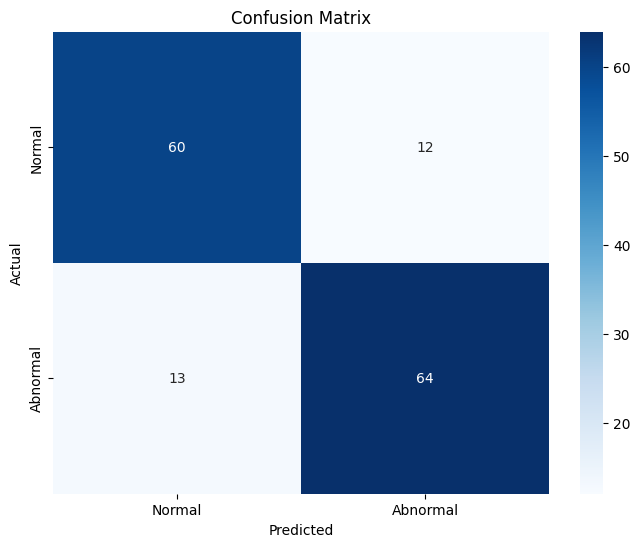

C:\Users\DCL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1200x500 with 0 Axes>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

sensory_abnormal_df = pd.read_csv(r'D:\Sayeem\Research\Brain Sclerosis\Predicted Segmentation\Sensory_Abnormal.csv')
sensory_normal_df = pd.read_csv(r'D:\Sayeem\Research\Brain Sclerosis\Predicted Segmentation\Sensory_Normal.csv')

sensory_abnormal_df['Sensory_Status'] = 'Abnormal'
sensory_normal_df['Sensory_Status'] = 'Normal'

data_df = pd.concat([sensory_abnormal_df, sensory_normal_df])

data_df['Sensory_Status'] = data_df['Sensory_Status'].map({'Normal': 0, 'Abnormal': 1})

features = data_df.drop(columns=['Sensory_Status', 'Image'])
labels = data_df['Sensory_Status']

features.replace([np.inf, -np.inf], np.nan, inplace=True)

features.fillna(features.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

joblib.dump(model, 'sensory_status_model_logistics_regression.joblib')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.show()


In [ ]:
#Naive Bayes ->

Accuracy: 0.697986577181208
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        72
           1       0.66      0.87      0.75        77

    accuracy                           0.70       149
   macro avg       0.72      0.69      0.69       149
weighted avg       0.72      0.70      0.69       149



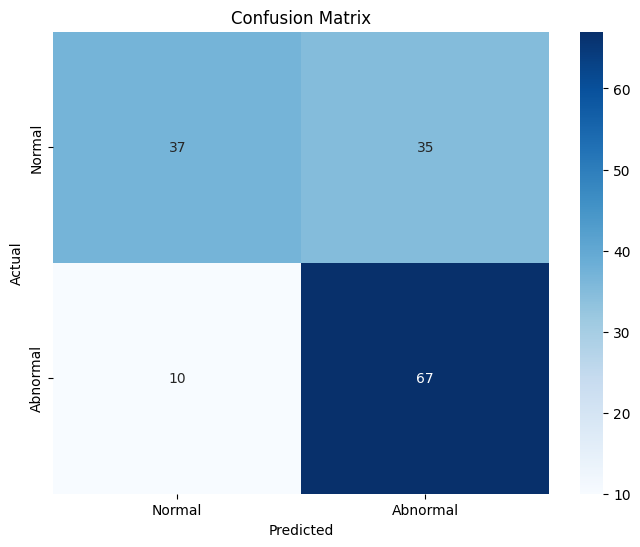

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
sensory_abnormal_df = pd.read_csv('E:/Research data/MS/Sensory_Abnormal.csv')
sensory_normal_df = pd.read_csv('E:/Research data/MS/Sensory_Normal.csv')

# Add a column to each DataFrame to indicate the label
sensory_abnormal_df['Sensory_Status'] = 'Abnormal'
sensory_normal_df['Sensory_Status'] = 'Normal'

# Combine the DataFrames
data_df = pd.concat([sensory_abnormal_df, sensory_normal_df])

# Encode the target variable
data_df['Sensory_Status'] = data_df['Sensory_Status'].map({'Normal': 0, 'Abnormal': 1})

# Drop columns that are not features
features = data_df.drop(columns=['Sensory_Status', 'Image'])
labels = data_df['Sensory_Status']

# Check for infinite values and replace them with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaNs with the median value of each column
features.fillna(features.median(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Save the model
joblib.dump(model, 'sensory_status_naive_bayes_model.joblib')

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# To load the model later, we can use:
# model = joblib.load('sensory_status_naive_bayes_model.joblib')
